<a href="https://colab.research.google.com/github/tnwls6865/Creative_Masters/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creative Masters

## Recurrent Neural Networks

RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다. 

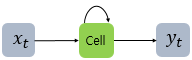

$x$는 입력층의 입력 벡터, $y$는 출력층의 출력 벡터입니다. 실제로는 편향 $b$도 입력으로 존재할 수 있지만 앞으로의 그림에서는 생략합니다. RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 합니다. 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현합니다. 

메모리 셀이 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값을 은닉 상태(hidden state)라고 합니다. 다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용합니다. 

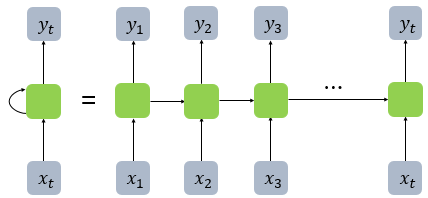

RNN을 표현할 때는 일반적으로 위의 그림에서 좌측과 같이 화살표로 사이클을 그려서 재귀 형태로 표현하기도 하지만, 우측과 같이 사이클을 그리는 화살표 대신 여러 시점으로 펼쳐서 표현하기도 합니다. 두 그림은 동일한 그림으로 단지 사이클을 그리는 화살표를 사용하여 표현하였느냐, 시점의 흐름에 따라서 표현하였느냐의 차이일 뿐 둘 다 동일한 RNN을 표현하고 있습니다.

피드 포워드 신경망에서는 뉴런이라는 단위를 사용했지만, RNN에서는 뉴런이라는 단위보다는 입력층과 출력층에서는 각각 입력 벡터와 출력 벡터, 은닉층에서는 은닉 상태라는 표현을 주로 사용합니다. 그래서 사실 위의 그림에서 회색과 초록색으로 표현한 각 네모들은 기본적으로 벡터 단위를 가정하고 있습니다. 피드 포워드 신경망과의 차이를 비교하기 위해서 RNN을 뉴런 단위로 시각화해보겠습니다. 

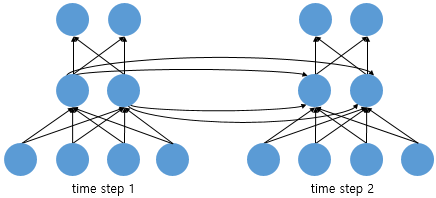

### Notation

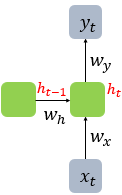

현재 시점 $t$에서의 은닉 상태값을 $h_t$라고 정의하겠습니다. 은닉층의 메모리 셀은 $h_t$를 계산하기 위해서 총 두 개의 가중치를 갖게 됩니다. 하나는 입력층에서 입력값을 위한 가중치 $W_x$이고, 하나는 이전 시점 $t-1$의 은닉 상태값인 $h_{t-1}$을 위한 가중치 $W_h$입니다. 

은닉층: $h_t=tanh(W_x x_t + W_h h_{t-1} + b)$
출력층: $y_t=f(W_h h_t + b)$

RNN의 은닉층 연산을 벡터와 행렬 연산으로 이해할 수 있습니다. 자연어 처리에서 RNN의 입력 $x_t$는 대부분의 경우에서 단어 벡터로 간주할 수 있는데, 단어 벡터의 차원을 라고 $d$하고, 은닉 상태의 크기를 $D_h$라고 하였을 때 각 벡터와 행렬의 크기는 다음과 같습니다. 

$x_t : (d \times 1)$ \\
$W_x : (D_h \times d)$ \\
$W_h : (D_h \times D_h)$ \\
$h_{t-1} : (D_H \times 1)$ \\
$b : (D_h \times 1)$

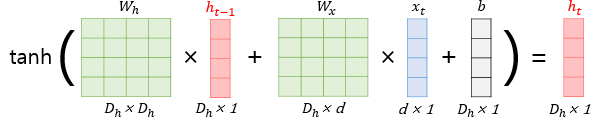

## RNN Implementation

### Numpy Implementation

우선 t 시점의 은닉 상태를 hidden_state_t라는 변수로 선언하였고, 입력 데이터의 길이를 input_length로 선언하였습니다. 이 경우, 입력 데이터의 길이는 곧 총 시점의 수(timesteps)가 됩니다. 그리고 t 시점의 입력값을 input_t로 선언하였습니다. 각 메모리 셀은 각 시점마다 input_t와 hidden_sate_t(이전 상태의 은닉 상태)를 입력으로 활성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현 시점의 hidden_state_t를 계산합니다.

의사 코드를 통해 간단히 개념 정립을 해보았습니다. 이제 RNN 층을 실제 동작되는 코드로 구현해보겠습니다. 아래의 코드는 이해를 돕기 위해 (timesteps, input_size) 크기의 2D 텐서를 입력으로 받았다고 가정하였으나, 실제로 파이토치에서는 (batch_size, timesteps, input_size)의 크기의 3D 텐서를 입력으로 받는 것을 기억합시다.

In [ ]:
import numpy as np

timesteps = 10 # Timestep; 보통 문장의 길이가 됩니다.
input_size = 4 # 입력의 차원; 보통 단어 벡터의 차원이 됩다.
hidden_size = 8 # Hidden state의 크기. 메모리 셀의 용량이 됩니다.

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) 

우선 시점, 입력의 차원, 은닉 상태의 크기, 그리고 초기 은닉 상태를 정의하였습니다. 현재 초기 은닉 상태는 0의 값을 가지는 벡터로 초기화가 된 상태입니다. 초기 은닉 상태를 출력해보겠습니다.

In [ ]:
print(hidden_state_t) # 8의 크기를 가지는 은닉 상태.

[0. 0. 0. 0. 0. 0. 0. 0.]


은닉 상태의 크기를 8로 정의하였으므로 8의 차원을 가지는 0의 값으로 구성된 벡터가 출력됩니다. 이제 가중치와 편향을 정의합니다.

In [ ]:
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [ ]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


각 가중치와 편향의 크기는 다음과 같습니다. Wx는 (은닉 상태의 크기 × 입력의 차원), Wh는 (은닉 상태의 크기 × 은닉 상태의 크기), b는 (은닉 상태의 크기)의 크기를 가집니다. 이제 모든 시점의 은닉 상태를 출력한다고 가정하고, RNN 층을 동작시켜봅시다.

In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) # 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.98373084 0.99155838 0.95270771 0.99301876 0.96980793 0.89300505
  0.98996317 0.9747377 ]
 [0.99999627 0.9999998  0.99999941 0.99997539 0.99980546 0.99999285
  0.99998527 0.99999707]
 [0.99999232 0.9999996  0.99999884 0.99990986 0.99941732 0.99998798
  0.99996074 0.9999959 ]
 [0.99999226 0.99999959 0.99999926 0.99991832 0.99957911 0.99999383
  0.99995655 0.99999605]
 [0.99999245 0.9999997  0.99999929 0.99994187 0.99944387 0.99998035
  0.99998096 0.99999653]
 [0.99997815 0.99999774 0.99999729 0.99972129 0.9974039  0.99993911
  0.99990931 0.99998042]
 [0.99998664 0.99999927 0.99999917 0.99989957 0.99898909 0.99996842
  0.99996894 0.99999259]
 [0.99998337 0.99999874 0.99999799 0.99976158 0.99856215 0.99997739
  0.99990231 0.99998982]
 [0.99999244 0.99999965 0.99999876 0.99992037 0.99931285 0.99997838
  0.99997261 0.99999612]
 [0.99999351 0.9999996  0.99999832 0.99990004 0.99945942 0.9999911
  0.9999481  0.9999959 ]]

### PyTorch Implementation

파이토치에서는 nn.RNN()을 통해서 RNN 셀을 구현합니다. 실습을 통해 이해해봅시다. 우선 필요한 파이토치의 도구들을 임포트합니다.

In [ ]:
import torch
import torch.nn as nn

이제 입력의 크기와 은닉 상태의 크기를 정의합니다. 은닉 상태의 크기는 대표적인 RNN의 하이퍼파라미터입니다. 여기서 입력의 크기는 매 시점마다 들어가는 입력의 크기를 의미합니다.

In [ ]:
input_size = 5
hidden_size = 8

이제 입력 텐서를 정의합니다. 입력 텐서는 (배치 크기 × 시점의 수 × 매 시점마다 들어가는 입력)의 크기를 가집니다. 여기서는 배치 크기는 1, 10번의 시점동안 5차원의 입력 벡터가 들어가도록 텐서를 정의합니다.

In [ ]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

이제 nn.RNN()을 사용하여 RNN의 셀을 만듭니다. 인자로 입력의 크기, 은닉 상태의 크기를 정의해주고, batch_first=True를 통해서 입력 텐서의 첫번째 차원이 배치 크기임을 알려줍니다.

In [ ]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

입력 텐서를 RNN 셀에 입력하여 출력을 확인해봅시다.

In [ ]:
outputs, _status = cell(inputs)

RNN 셀은 두 개의 입력을 리턴하는데, 첫번째 리턴값은 모든 시점(timesteps)의 은닉 상태들이며, 두번째 리턴값은 마지막 시점(timestep)의 은닉 상태입니다. 우선 첫번째 리턴값에 대해서 크기를 확인해봅시다.

In [ ]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


첫번째 리턴값의 은닉 상태들은 (1, 10, 8)의 크기를 가집니다. 이는 10번의 시점동안 8차원의 은닉상태가 출력되었다는 의미입니다. 두번째 리턴값. 다시 말해 마지막 시점의 은닉 상태의 크기를 확인해보겠습니다.

In [ ]:
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 1, 8])


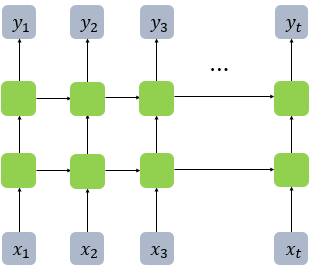

RNN도 다수의 은닉층을 가질 수 있습니다. 위의 그림은 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망의 모습을 보여줍니다. 위의 코드에서 첫번째 은닉층은 다음 은닉층에 모든 시점에 대해서 은닉 상태 값을 다음 은닉층으로 보내주고 있습니다.

깊은 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 num_layers에 값을 전달하여 층을 쌓습니다. 층이 2개인 깊은 순환 신경망의 경우, 앞서 실습했던 임의의 입력에 대해서 출력이 어떻게 달라지는지 확인해봅시다.

In [ ]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [ ]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)

In [ ]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


첫번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라지지 않았습니다. 여기서는 마지막 층의 모든 시점의 은닉 상태들입니다.

In [ ]:
print(_status.shape) # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 1, 8])


RNN이 과거 시점(time step)의 데이터들을 참고해서, 찾고자하는 정답을 예측하지만 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 많습니다. 그래서 이전 시점의 데이터뿐만 아니라, 이후 시점의 데이터도 힌트로 활용하기 위해서 고안된 것이 양방향 RNN입니다. 

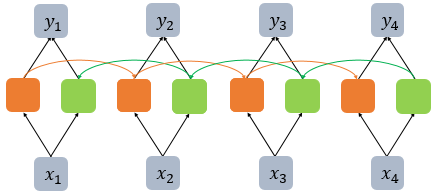

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 주황색 메모리 셀에 해당됩니다. 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 초록색 메모리 셀에 해당됩니다. 그리고 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용됩니다.

물론, 양방향 RNN도 다수의 은닉층을 가질 수 있습니다. 아래의 그림은 양방향 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 양방향 순환 신경망의 모습을 보여줍니다. 

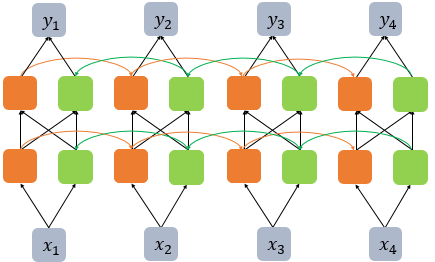

In [ ]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [ ]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

In [ ]:
outputs, _status = cell(inputs)

In [ ]:
print(outputs.shape) # (배치 크기, 시퀀스 길이, hidden의 크기 x 2)

torch.Size([1, 10, 16])


첫번째 리턴값의 크기는 단뱡 RNN 셀 때보다 은닉 상태의 크기의 값이 두 배가 되었습니다. 여기서는 (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)의 크기를 가집니다. 이는 양방향의 은닉 상태 값들이 연결(concatenate)되었기 때문입니다.

In [ ]:
print(_status.shape) # (층의 개수 x 2, 배치 크기, hidden의 크기)

torch.Size([4, 1, 8])


### LSTM Implementation

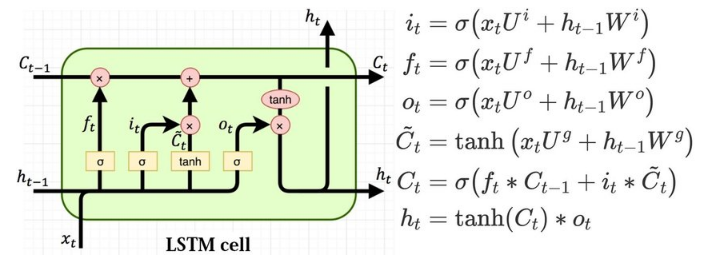

* Forget Gate \\
망각 게이트는 과거 정보를 어느정도 기억할 지 결정합니다. 과거 정보와 현재 데이터를 입력받아 시그모이드를 취한 후, 그 값을 과거 정보에 곱해 줍니다. 따라서 시그모이드 출력이 0이면 과거 정보를 버리고, 1이면 과거 정보를 온전히 보존합니다. 

* Input Gate \\
Input Gate는 현재 정보를 기억합니다. 과거 정보와 현제 데이터를 입력받아 시그모이드와 하이퍼볼릭 탄젠트 함수를 기반으로 현 정보에 대한 보존량을 결정합니다. 즉, 현 메모리에 새로운 정보를 반영할지 결정하는 역할을 합니다. 계산 값이 1이면 입력 xt​가 들어올 수 있도록 허용(open)하고, 계산 값이 0이면 차단합니다.

* Cell Gate \\
각 단계에 대한 은닉 노드(hidden node)를 메모리 셀이라 합니다. 총합을 사용하여 셀 값을 반영하며, 이로써 기울기 소멸 문제를 완화시킵니다. 망각 게이트와 입력 게이트의 이전단계 셀 정보를 계산하여 현재 단계 셀 상태를 업데이트합니다. 

* Output Gate \\
Output Gate는 과거 정보와 현 데이터를 사용하여 뉴런의 출력을 결정합니다. 이전 은닉 상태와 t번째 입력을 고려해 다음 은닉 상태를 계산합니다. 그리고 LSTM에서는 이 은닉 상태가 그 시점에서의 출력이 됩니다. 출력 게이트는 갱신된 메모리의 출력 값을 제어하는 역할을 합니다. 계산한 값이 1이면 의미 있는 결과로 최종 출력하고, 계산한 값이 0이면 해당 연산 출력을 하지 않습니다.

In [ ]:
import math
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
class LSTMCell(nn.Module) :
    def __init__(self, input_size, hidden_size, bias=True) :
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4*hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 4*hidden_size, bias=bias)
        self.reset_parameters()
        
    def reset_parameters(self) :
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters() :
            w.data.uniform_(-std, std)
            
    def forward(self, x, hidden) :
        hx, cx = hidden
        x = x.view(-1, x.size(1))
        
        gates = self.x2h(x) + self.h2h(hx)
        gates = gates.squeeze()
        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)
        
        ingate = F.sigmoid(ingate) # 입력 게이트에 시그모이드 적용
        forgetgate = F.sigmoid(forgetgate) # 망각 게이트에 시그모이드 적용
        cellgate = F.tanh(cellgate) # 셀 게이트에 탄젠트 적용
        outgate = F.sigmoid(outgate) # 출력 게이트에 시그모이드 적용
        
        cy = torch.mul(cx, forgetgate) + torch.mul(ingate, cellgate)
        hy = torch.mul(outgate, F.tanh(cy))
        
        return (hy, cy)

In [ ]:
class LSTMModel(nn.Module) :
   def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True) :
       super(LSTMModel, self).__init__()
       self.hidden_dim = hidden_dim
       
       self.layer_dim = layer_dim
       self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)
       self.fc = nn.Linear(hidden_dim, output_dim)
       
   def forward(self, x) :
       if torch.cuda.is_available() :
           h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
       else :
           h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
           
       if torch.cuda.is_available() :
           c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
       else :
           c0 = Variable(torch.zeros(self.layer_dim, x.size(0), hidden_dim))
           
       outs = []
       cn =  c0[0,:,:]
       hn = h0[0,:,:]
       
       for seq in range(x.size(1)) :
           hn, cn = self.lstm(x[:, seq, :], (hn, cn))
           outs.append(hn)
           
       out = outs[-1].squeeze()
       out = self.fc(out)
       return out

In [ ]:
input_dim=28
hidden_dim=128
layer_dim=2
output_dim=10

model =  LSTMModel(input_dim, hidden_dim, layer_dim, output_dim) 
if torch.cuda.is_available() :
   model.cuda()

LSTM 모델을 구현해보았으니 본격적으로 모델 학습을 진행해보도록 하겠습니다. 이번 실습에서는 우선 MNIST 데이터로 실습을 진행하도록 하겠습니다.

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.nn import Parameter
from torch import Tensor
from torch.utils.data import DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available() : 
    torch.cuda.manual_seed_all(125)

데이터를 불러오도록 하겠습니다.

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (1.0,))
])


download_root = '.'

train_dataset = MNIST(download_root, transform=mnist_transform, 
                      train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform,
                     train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform,
                    train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 467715643.25it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 18607633.46it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 174344342.96it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21073593.77it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



DataLoader를 설정합니다.

In [ ]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

Hyper-parameter를 설정합니다.

In [ ]:
num_epochs = 3

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

본격적으로 실험을 진행하겠습니다.

In [ ]:
seq_dim=28
loss_list = []
iter = 0
for epoch in range(num_epochs) :
   for i, (images ,labels) in enumerate(train_loader) :
       if torch.cuda.is_available() :
           images = Variable(images.view(-1, seq_dim, input_dim).cuda())
           labels = Variable(labels.cuda())
       
       else :
           images = Variable(images.view(-1, seq_dim, input_dim))
           labels = Variable(labels)
           
       optimizer.zero_grad()
       outputs = model(images)
       loss = criterion(outputs, labels)
       
       if torch.cuda.is_available() :
           loss.cuda()
           
       loss.backward()
       optimizer.step()
       loss_list.append(loss.item())
       iter += 1
       
       
       if iter % 500 == 0 :
           correct = 0
           total = 0
           
           for images, labels in valid_loader :
               
               if torch.cuda.is_available() :
                   images = Variable(images.view(-1, seq_dim, input_dim).cuda())
               else :
                   images = Variable(images.view(-1, seq_dim, input_dim))
                   
               outputs = model(images)
               _, predicted = torch.max(outputs.data, 1)
               
               total += labels.size(0)
               if torch.cuda.is_available() : 
                   correct += (predicted.cpu() == labels.cpu()).sum()
                   
               else :
                   correct += (predicted == labels).sum()
                   
           accuracy = 100 * correct / total
           print(f'Iteration : {iter} Loss : {loss.item()} Accuracy : {accuracy}')

Iteration : 500 Loss : 2.2730965614318848 Accuracy : 18.170000076293945
Iteration : 1000 Loss : 0.9722868204116821 Accuracy : 68.19000244140625
Iteration : 1500 Loss : 0.27107077836990356 Accuracy : 88.45999908447266
Iteration : 2000 Loss : 0.4049454629421234 Accuracy : 91.80000305175781
Iteration : 2500 Loss : 0.31699344515800476 Accuracy : 94.5999984741211


### LSTM Stock Prediction

지금까지 전체적으로 모델에 대해서 구현을 해보았으니 실제 데이터에 모델을 접목해서 실습을 진행하도록 하겠습니다. 이번 실습에서 진행할 내용은 LSTM 모델을 활용한 주가예측입니다.

In [ ]:
import torch
import torch.nn
import torchvision.transforms as transforms
import torchvision.datasets
from torch.autograd import Variable
from torch.nn import Parameter
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
plt.style.use('seaborn-whitegrid')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)

if torch.cuda.is_available() :
    torch.cuda.manual_seed_all(125)

<ipython-input-41-c8a1c679a725>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


주가 데이터를 불러오기 위해서 yfinance 라이브러리를 활용하도록 하겠습니다. yfinance는 yahoo finance 라이브러리로, yahoo에서 제공하는 주가정보를 쉽게 불러올 수 있습니다.

In [ ]:
import yfinance as yf
df = yf.download('005930.KS',
                     start='2022-01-01',
                     end='2022-05-31') # 005930 : 삼성전자 주가
df = df.drop(columns='Adj Close')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,9947422


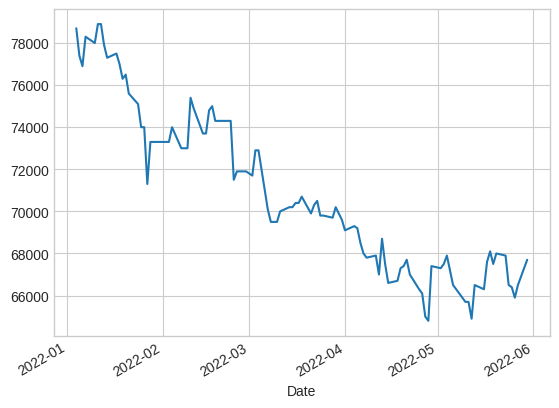

In [ ]:
# data check
fig = df['Close'].plot()

이번 실습에서는 종가 예측을 진행해보도록 하겠습니다. 그러므로 예측할 종가를 제외하고 나머지 값들로 입력을 구성해줍니다.

In [ ]:
X = df.drop('Close', axis=1) # X, y 분리
y = df[['Close']]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ms = MinMaxScaler() # 0 ~ 1
ss = StandardScaler() # 평균 0, 분산 1

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:79, :]
X_test = X_ss[79:, :]

y_train = y_ms[:79, :]
y_test = y_ms[79:, :]

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (79, 4) (79, 1)
Testing Shape : (19, 4) (19, 1)


데이터셋 형태 및 크기를 조정하도록 하겠습니다.

In [ ]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, 
                                  (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))

X_test_tensors_f = torch.reshape(X_test_tensors,
                                (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (79, 4) (79, 1)
Testing Shape : (19, 4) (19, 1)


nn.LSTM을 활용하여 모델을 새워보도록 하겠습니다.

In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes # 클래스
        self.num_layers = num_layers # LSTM 계층 개수
        self.input_size = input_size  # 입력 크기(컬럼 개수)
        self.hidden_size = hidden_size # 은닉층의 뉴런 개수
        self.seq_length = seq_length # 시퀀스 길이

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) # lstm 계층
        self.fc_1 =  nn.Linear(hidden_size, 128) # 완전연결층
        self.fc = nn.Linear(128, num_classes) # 출력층

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) # 은닉상태 초기화
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) # 셀 상태 초기화
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # lstm 계층에 은닉 상태와 셀 상태 적용
        hn = hn.view(-1, self.hidden_size) # 완전연결층 적용을 위해 데이터 형태를 1차원으로 조정
        out = self.relu(hn)
        out = self.fc_1(out) 
        out = self.relu(out) 
        out = self.fc(out)
        return out

Hyper-parameter를 설정하도록 하겠습니다.

In [ ]:
num_epochs = 1000
lr = 0.0001

input_size=4 # 칼럼 개수
hidden_size=2 # 은닉층 유닛 개수
num_layers=1 # LSTM 계층 개수

num_classes=1 # 클래스 개수
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

학습을 진행하겠습니다.

In [ ]:
for epoch in range(num_epochs) :
    outputs = model.forward(X_train_tensors_f) # 전방향 학습
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors) # 오차 계싼
    loss.backward() # 기울기 계산
    
    optimizer.step() # 오차 업데이트
    if epoch % 100 == 0 :
        print(f'Epoch : {epoch}, loss : {loss.item():1.5f}')

Epoch : 0, loss : 0.12536
Epoch : 100, loss : 0.00829
Epoch : 200, loss : 0.00213
Epoch : 300, loss : 0.00076
Epoch : 400, loss : 0.00045
Epoch : 500, loss : 0.00035
Epoch : 600, loss : 0.00032
Epoch : 700, loss : 0.00031
Epoch : 800, loss : 0.00031
Epoch : 900, loss : 0.00030


loss가 어느정도 수렴한 거 같으니 실제 데이터에 접목시켜서 예측을 해보도록 하겠습니다.

In [ ]:
df_x_ss = ss.transform(X)
df_y_ms = ms.transform(y)

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

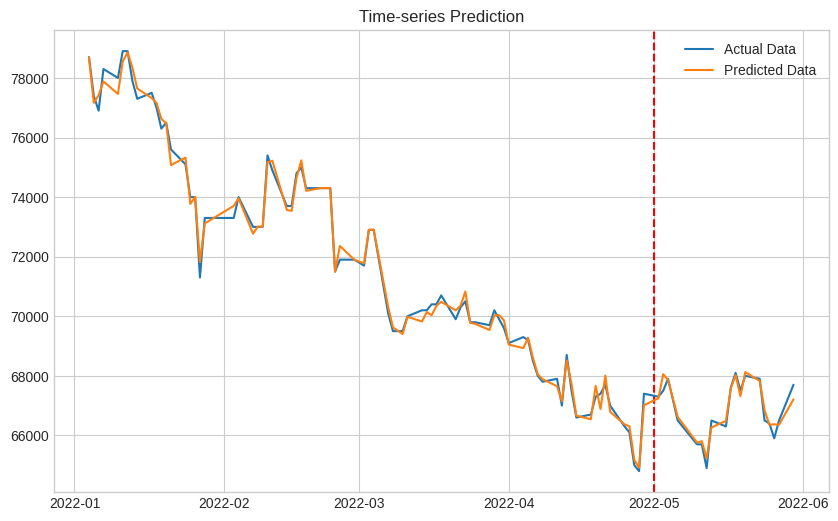

In [ ]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()

label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
plt.axvline(x=datetime(2022,5,1), c='r', linestyle='--')

df['pred'] = predicted
plt.plot(df['Close'], label='Actual Data')
plt.plot(df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

### Stock Prediction with GRU and More Time Step

방금은 Time-step이 1인 상태에 대해서만 학습을 진행했습니다. 즉, 어제의 종가를 보고 오늘의 종가를 맞추는 간단한 태스크였습니다. 이번엔 성능 향상을 위해서 다른 모델도 써보고, 더 많은 Time-step을 도입해보도록 하겠습니다.

In [ ]:
df = yf.download('005930.KS', start='2019-01-01', end='2022-05-31')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34283.773438,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33266.320312,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,33133.617188,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34283.773438,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,33708.699219,12756554


In [ ]:
#종가 제외 스케일링 

scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open','High', 'Low','Close','Volume']])

In [ ]:
#넘파이 배열로 변경 

x = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

#시퀀스 데이터 생성 

def seq_data(x, y, sequence_length):
  x_seq = []
  y_seq = []
  for i in range(len(x) - sequence_length):
    x_seq.append(x[ i : i + sequence_length])
    y_seq.append(y[i + sequence_length])

  return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view(-1,1)

In [ ]:
split = 500
sequence_length=5
x_seq, y_seq = seq_data(x, y, sequence_length)

#순서대로 500개는 학습, 나머지는 평가 

x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]

x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]

print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())

torch.Size([500, 5, 4]) torch.Size([500, 1])
torch.Size([335, 5, 4]) torch.Size([335, 1])


<ipython-input-56-0c3a61cb7c59>:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view(-1,1)


In [ ]:
train = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)
test = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)

batch_size = 20
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size = batch_size)

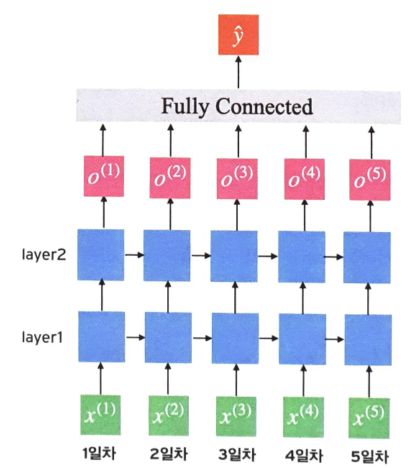

위의 이미지와 같은 구조의 모델을 생성하고, 기본 hyper-parameter를 설정합니다.

In [ ]:
input_size = x_seq.size(2) 
num_lyaers = 2
hidden_size = 8

In [ ]:
class GRUmodel(nn.Module):
  def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
    super(GRUmodel, self).__init__()
    self.device = device 
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.rnn = nn.GRU(input_size, hidden_size, num_layers, batch_first=True) #한 줄로 모델 정의 
    self.fc = nn.Sequential(nn.Linear(hidden_size * sequence_length, 1), nn.Sigmoid()) #RNN 층에서 나온 결과를 fc 층으로 전달해서 예측값 계산 

  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device) #초기값 0으로 설정 
    out,_ = self.rnn(x, h0)
    out = out.reshape(out.shape[0], -1)
    out = self.fc(out)
    return out

model = GRUmodel(input_size=input_size,
                 hidden_size = hidden_size,
                 sequence_length=sequence_length,
                 num_layers=num_layers, 
                 device=device).to(device)

In [ ]:
criterion = nn.MSELoss()
num_epochs = 301
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
loss_graph = []
n = len(train_loader)

for epoch in range(num_epochs):
  running_loss = 0

  for data in train_loader:
    seq, target = data 
    out = model(seq) 
    loss = criterion(out, target) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  loss_graph.append(running_loss/n)
  if epoch % 100==0:
    print('[epoch : %d] loss: %.4f' %(epoch, running_loss/n))

[epoch : 0] loss: 0.0817
[epoch : 100] loss: 0.0011
[epoch : 200] loss: 0.0007
[epoch : 300] loss: 0.0005


학습이 잘 진행된 것으로 생각되므로 실제 값과 예측 값을 비교하도록 하겠습니다.

In [ ]:
concatdata = torch.utils.data.ConcatDataset([train, test])
data_loader = torch.utils.data.DataLoader(dataset = concatdata, batch_size = 100)

with torch.no_grad():
  pred = list()
  model.eval()
  for data in data_loader:
    seq, target = data
    out = model(seq)
    pred += out.cpu().tolist()

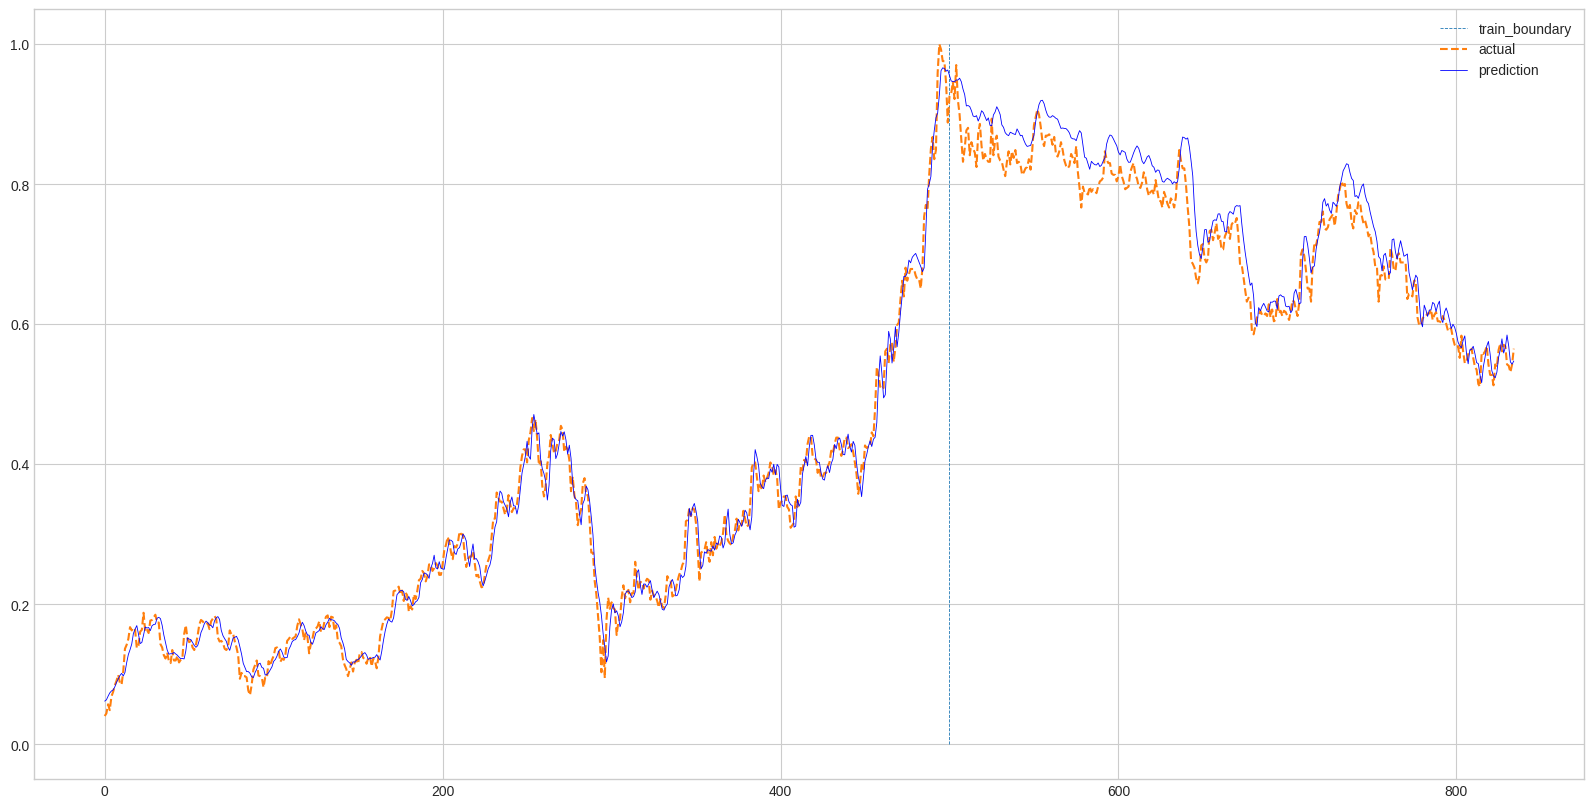

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(np.ones(100)*len(train), np.linspace(0,1,100), '--', linewidth=0.6)
plt.plot(df['Close'][sequence_length:].values,'--')
plt.plot(pred, 'b', linewidth = 0.6)
plt.legend(['train_boundary','actual','prediction'])
plt.show()

## Transformer Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import math
import numpy as np
import random

nn.Transformer의 주요 파라미터는 다음과 같습니다.

    d_model: 트랜스포머의 인코더와 디코더에서의 정해진 입력과 출력의 크기를 의미 (default=512)
    num_encoder_layers: 인코더가 총 몇 층으로 구성되었는지를 의미. (default=6)
    num_decoder_layers: 디코더가 총 몇 층으로 구성되었는지를 의미. (default=6)
    nhead: 멀티헤드 어텐션 모델의 헤드 수 (default=8)
    dim_feedforward: FFNN 은닉층의 크기(default=2048)


In [ ]:
class Transformer(nn.Module):
    def __init__(self, num_tokens, dim_model, num_heads, num_encoder_layers, num_decoder_layers, dropout_p, ):
        super().__init__()

        # Layers
        self.transformer = nn.Transformer(
            d_model=dim_model,
            nhead=num_heads,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dropout=dropout_p,
        )

    def forward(self):
        pass

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
        
        self.dropout = nn.Dropout(dropout_p)

        # Encoding - From formula
        pos_encoding = torch.zeros(max_len, dim_model)
        positions_list = torch.arange(0, max_len, dtype=torch.float).view(-1, 1) # 0, 1, 2, 3, 4, 5
        division_term = torch.exp(torch.arange(0, dim_model, 2).float() * (-math.log(10000.0)) / dim_model) # 1000^(2i/dim_model)

        pos_encoding[:, 0::2] = torch.sin(positions_list * division_term)
        pos_encoding[:, 1::2] = torch.cos(positions_list * division_term)

        # Saving buffer (same as parameter without gradients needed)
        pos_encoding = pos_encoding.unsqueeze(0).transpose(0, 1)
        self.register_buffer("pos_encoding", pos_encoding)

    def forward(self, token_embedding: torch.tensor) -> torch.tensor:
        # Residual connection + pos encoding
        return self.dropout(token_embedding + self.pos_encoding[:token_embedding.size(0), :])

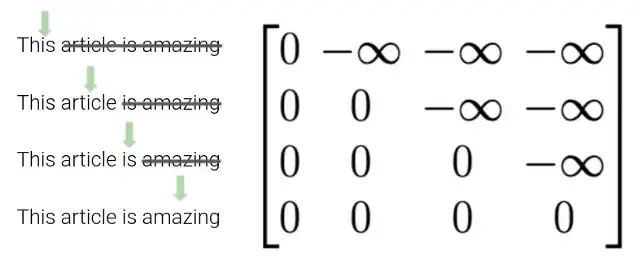

In [ ]:
class Transformer(nn.Module):
    # Constructor
    def __init__(self, num_tokens, dim_model, num_heads, num_encoder_layers, num_decoder_layers, dropout_p,):
        super().__init__()

        # INFO
        self.model_type = "Transformer"
        self.dim_model = dim_model

        # LAYERS
        self.positional_encoder = PositionalEncoding(dim_model=dim_model, dropout_p=dropout_p, max_len=5000)
        self.embedding = nn.Embedding(num_tokens, dim_model)
        self.transformer = nn.Transformer(
            d_model=dim_model,
            nhead=num_heads,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dropout=dropout_p,
        )
        self.out = nn.Linear(dim_model, num_tokens)

    def forward(self, src, tgt, tgt_mask=None, src_pad_mask=None, tgt_pad_mask=None):
        # src, Tgt size -> (batch_size, src sequence length)

        # Embedding + positional encoding - Out size = (batch_size, sequence length, dim_model)
        src = self.embedding(src) * math.sqrt(self.dim_model)
        tgt = self.embedding(tgt) * math.sqrt(self.dim_model)
        src = self.positional_encoder(src)
        tgt = self.positional_encoder(tgt)

        src = src.permute(1,0,2)
        tgt = tgt.permute(1,0,2)

        # Transformer blocks - Out size = (sequence length, batch_size, num_tokens)
        transformer_out = self.transformer(src, tgt, tgt_mask=tgt_mask, src_key_padding_mask=src_pad_mask, tgt_key_padding_mask=tgt_pad_mask)
        out = self.out(transformer_out)

        return out

    def get_tgt_mask(self, size) -> torch.tensor:
        mask = torch.tril(torch.ones(size, size) == 1) # Lower triangular matrix
        mask = mask.float()
        mask = mask.masked_fill(mask == 0, float('-inf')) # Convert zeros to -inf
        mask = mask.masked_fill(mask == 1, float(0.0)) # Convert ones to 0

        return mask

    def create_pad_mask(self, matrix: torch.tensor, pad_token: int) -> torch.tensor:
        return (matrix == pad_token)


* Layer에서 num_tokens 길이를 가진 입력 시퀀스가 dim_model 차원으로 임베딩 됩니다.

* forward()에서 처리되는 차원에 유의해야 합니다.
    - Transformer Encoder는 입력으로 [seq_len, batch_len, embedding_dim]을 사용합니다.
    - 이를 batch_fisrt를 적용하기 위해 premute(1,0,2)를 해서 [batch_len, seq_len, embedding_dim]로 만듭니다.

* get_tgt_mask() 함수는 디코더에 적용되는 Mask를 만들어주고, 삼각행렬 형태입니다.

* Transformer blocks에서 transfomer의 파라미터로 src_mask, key_padding_mask가 나옵니다.


실습을 위해서 random data를 만드는 함수를 작성하겠습니다. 실습의 시간 관계상 실제 데이터로는 시간이 오래 걸려서 임시로 데이터를 만들어 보겠습니다.

In [ ]:
def generate_random_data(n):
    SOS_token = np.array([2])
    EOS_token = np.array([3])
    length = 8

    data = []

    # 1,1,1,1,1 -> 1,1,1,1,1
    for i in range(n // 3):
        X = np.concatenate((SOS_token, np.ones(length), EOS_token))
        y = np.concatenate((SOS_token, np.ones(length), EOS_token))
        data.append([X, y])

    # 0,0,0,0 -> 0,0,0,0
    for i in range(n // 3):
        X = np.concatenate((SOS_token, np.zeros(length), EOS_token))
        y = np.concatenate((SOS_token, np.zeros(length), EOS_token))
        data.append([X, y])

    # 1,0,1,0 -> 1,0,1,0,1
    for i in range(n // 3):
        X = np.zeros(length)
        start = random.randint(0, 1)

        X[start::2] = 1

        y = np.zeros(length)
        if X[-1] == 0:
            y[::2] = 1
        else:
            y[1::2] = 1

        X = np.concatenate((SOS_token, X, EOS_token))
        y = np.concatenate((SOS_token, y, EOS_token))
        data.append([X, y])

    np.random.shuffle(data)

    return data

In [ ]:
#크기가 16인 배치 형태로 만들어 줍니다.
def batchify_data(data, batch_size=16, padding=False, padding_token=-1):
    batches = []
    for idx in range(0, len(data), batch_size):
        # batch_size 크기가 아닌 경우 마지막 비트를 얻지 않도록 합니다.
        if idx + batch_size < len(data):
            # 여기서 배치의 최대 길이를 가져와 PAD 토큰으로 길이를 정규화해야 합니다.
            if padding:
                max_batch_length = 0
                # batch에서 가장 긴 문장 가져오기
                for seq in data[idx : idx + batch_size]:
                    if len(seq) > max_batch_length:
                        max_batch_length = len(seq)

                # 최대 길이에 도달할 때까지 X 패딩 토큰을 추가합니다.
                for seq_idx in range(batch_size):
                    remaining_length = max_bath_length - len(data[idx + seq_idx])
                    data[idx + seq_idx] += [padding_token] * remaining_length

            batches.append(np.array(data[idx : idx + batch_size]).astype(np.int64))

    print(f"{len(batches)} batches of size {batch_size}")

    return batches

train_data = generate_random_data(9000)
val_data = generate_random_data(3000)

train_dataloader = batchify_data(train_data)
val_dataloader = batchify_data(val_data)

562 batches of size 16
187 batches of size 16


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Transformer(num_tokens=4,
                    dim_model=8,
                    num_heads=2,
                    num_encoder_layers=3,
                    num_decoder_layers=3,
                    dropout_p=0.1).to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

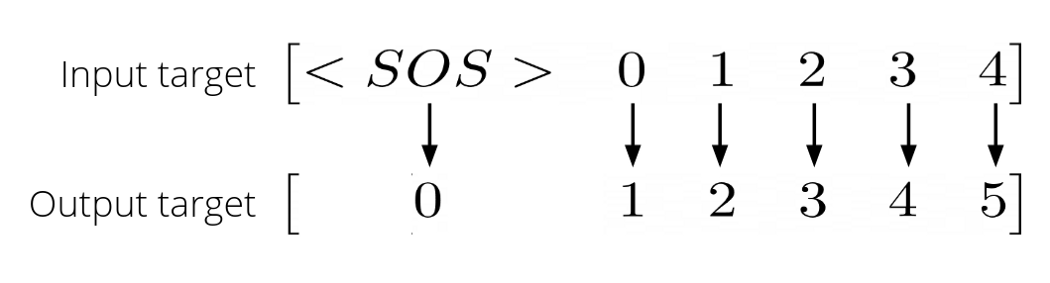

이제 본격적으로 학습을 진행해보도록 하겠습니다.

In [ ]:
def train_loop(model, opt, loss_fn, dataloader):
    model.train()
    total_loss = 0

    for batch in dataloader:
        X, y = batch[:, 0], batch[:, 1]
        X, y = torch.tensor(X).to(device), torch.tensor(y).to(device)

        # 이제 tgt를 1만큼 이동하여 <SOS>를 사용하여 pos 1에서 토큰을 예측
        y_input = y[:,:-1]
        y_expected = y[:,1:]

        # 다음 단어를 마스킹하려면 마스크 가져오기
        sequence_length = y_input.size(1)
        tgt_mask = model.get_tgt_mask(sequence_length).to(device)

        # X, y_input 및 tgt_mask를 전달하여 표준 training
        pred = model(X, y_input, tgt_mask)

        # Permute 를 수행하여 batch first
        pred = pred.permute(1, 2, 0)      
        loss = loss_fn(pred, y_expected)

        opt.zero_grad()
        loss.backward()
        opt.step()

        total_loss += loss.detach().item()

    return total_loss / len(dataloader)

def validation_loop(model, loss_fn, dataloader):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in dataloader:
            X, y = batch[:, 0], batch[:, 1]
            X, y = torch.tensor(X, dtype=torch.long, device=device), torch.tensor(y, dtype=torch.long, device=device)

            y_input = y[:,:-1]
            y_expected = y[:,1:]

            sequence_length = y_input.size(1)
            tgt_mask = model.get_tgt_mask(sequence_length).to(device)

            pred = model(X, y_input, tgt_mask)

            pred = pred.permute(1, 2, 0)      
            loss = loss_fn(pred, y_expected)
            total_loss += loss.detach().item()

    return total_loss / len(dataloader)

In [ ]:
def fit(model, opt, loss_fn, train_dataloader, val_dataloader, epochs):  
    # plotting하기 위한 리스트 생성 
    train_loss_list, validation_loss_list = [], []

    print("Training and validating model")
    for epoch in range(epochs):
        print("-"*25, f"Epoch {epoch + 1}","-"*25)

        train_loss = train_loop(model, opt, loss_fn, train_dataloader)
        train_loss_list += [train_loss]

        validation_loss = validation_loop(model, loss_fn, val_dataloader)
        validation_loss_list += [validation_loss]

        print(f"Training loss: {train_loss:.4f}")
        print(f"Validation loss: {validation_loss:.4f}")
        print()

    return train_loss_list, validation_loss_list

train_loss_list, validation_loss_list = fit(model, opt, loss_fn, train_dataloader, val_dataloader, 10)

Training and validating model
------------------------- Epoch 1 -------------------------
Training loss: 0.5277
Validation loss: 0.4041

------------------------- Epoch 2 -------------------------
Training loss: 0.4158
Validation loss: 0.3806

------------------------- Epoch 3 -------------------------
Training loss: 0.3905
Validation loss: 0.3597

------------------------- Epoch 4 -------------------------
Training loss: 0.3682
Validation loss: 0.3337

------------------------- Epoch 5 -------------------------
Training loss: 0.3432
Validation loss: 0.2929

------------------------- Epoch 6 -------------------------
Training loss: 0.3063
Validation loss: 0.2311

------------------------- Epoch 7 -------------------------
Training loss: 0.2775
Validation loss: 0.2000

------------------------- Epoch 8 -------------------------
Training loss: 0.2599
Validation loss: 0.1852

------------------------- Epoch 9 -------------------------
Training loss: 0.2468
Validation loss: 0.1722

-------

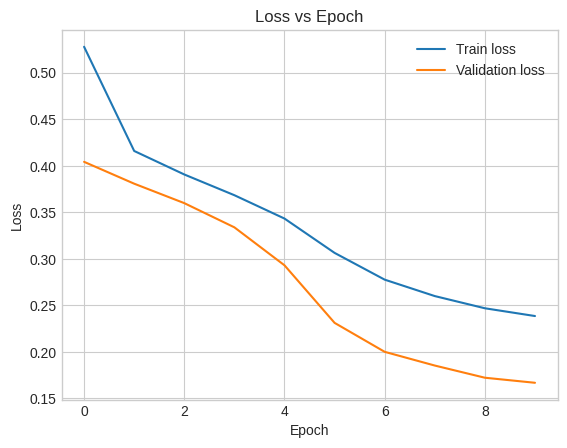

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list, label = "Train loss")
plt.plot(validation_loss_list, label = "Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

### Transformer 실습 코드 Git

* https://github.com/jadore801120/attention-is-all-you-need-pytorch/
* https://nlp.seas.harvard.edu/2018/04/03/attention.html
* https://jalammar.github.io/illustrated-transformer/